<a href="https://colab.research.google.com/github/gnani321/basic-ds-/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_excel('glass.xlsx',sheet_name='glass')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [ ]:
data.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


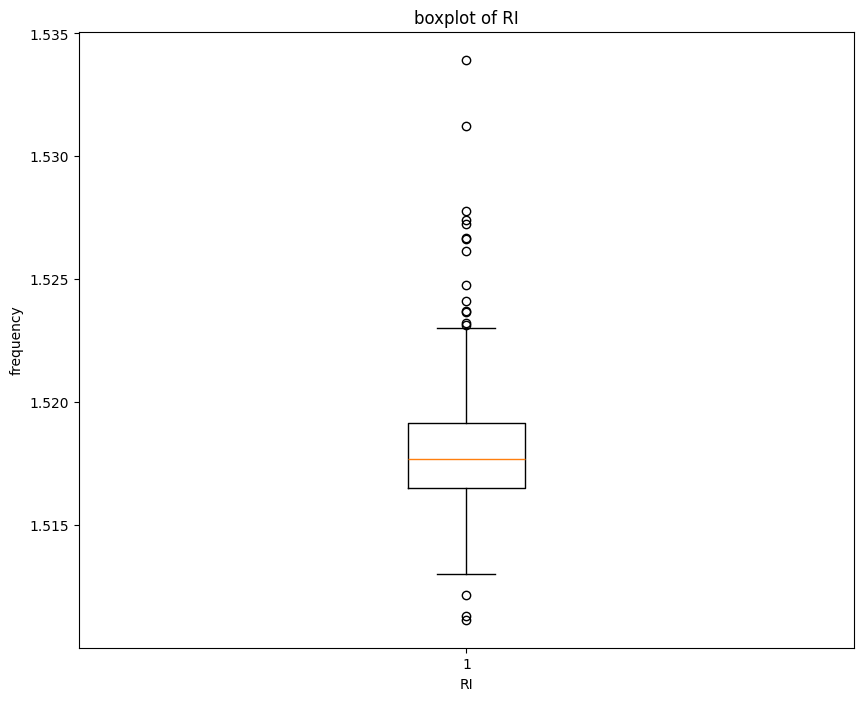

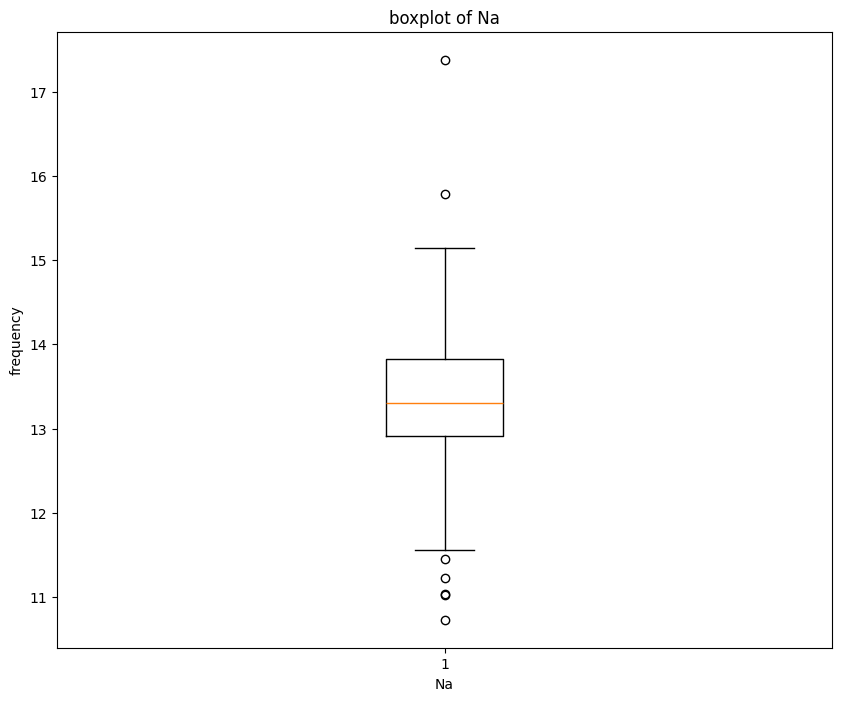

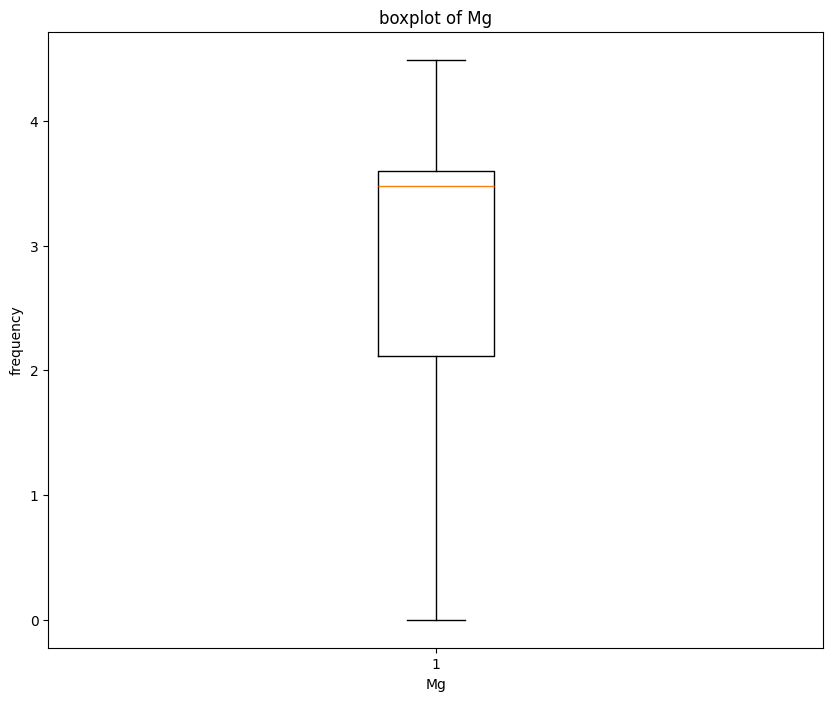

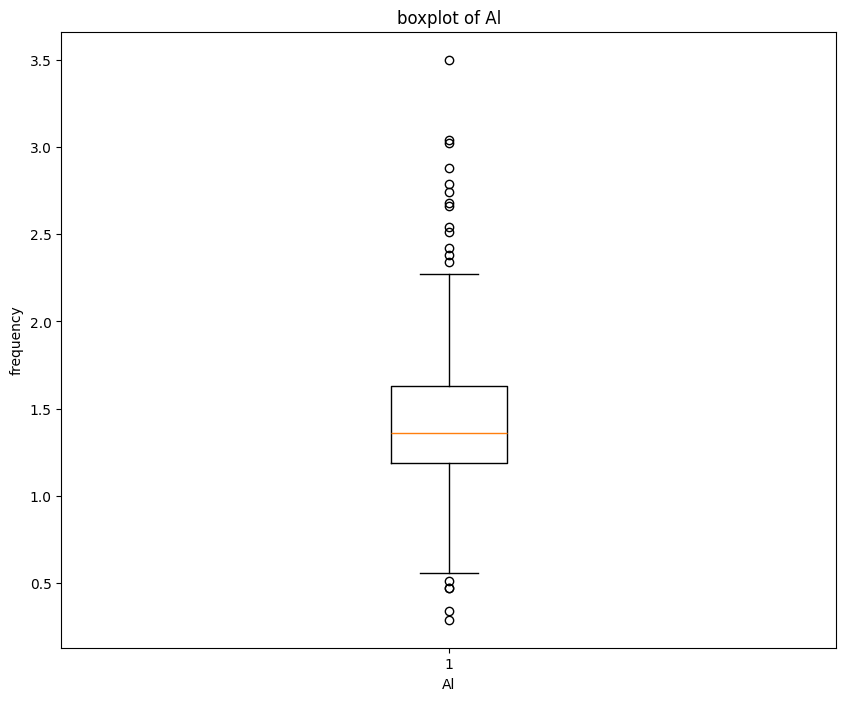

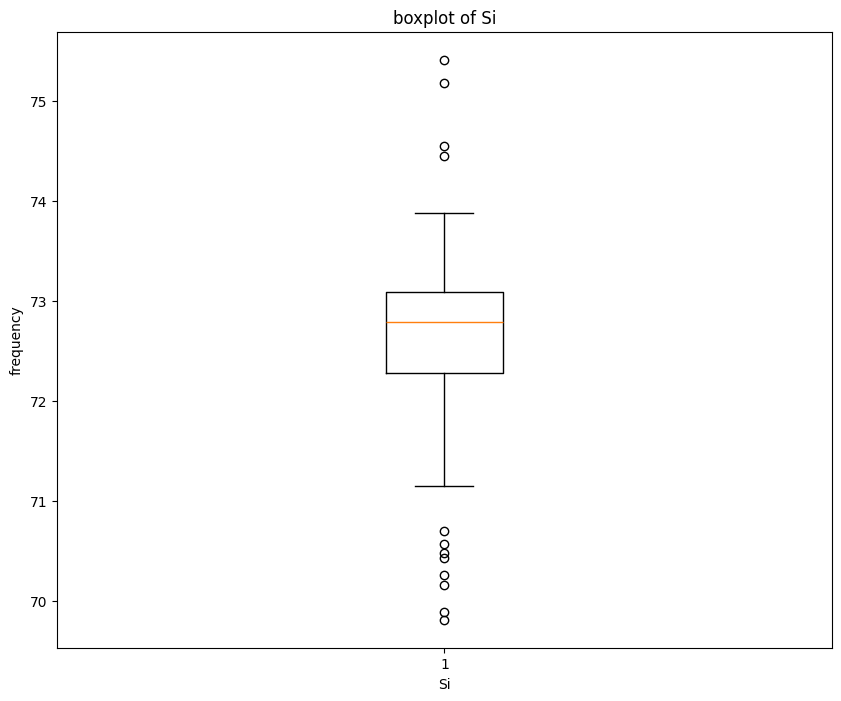

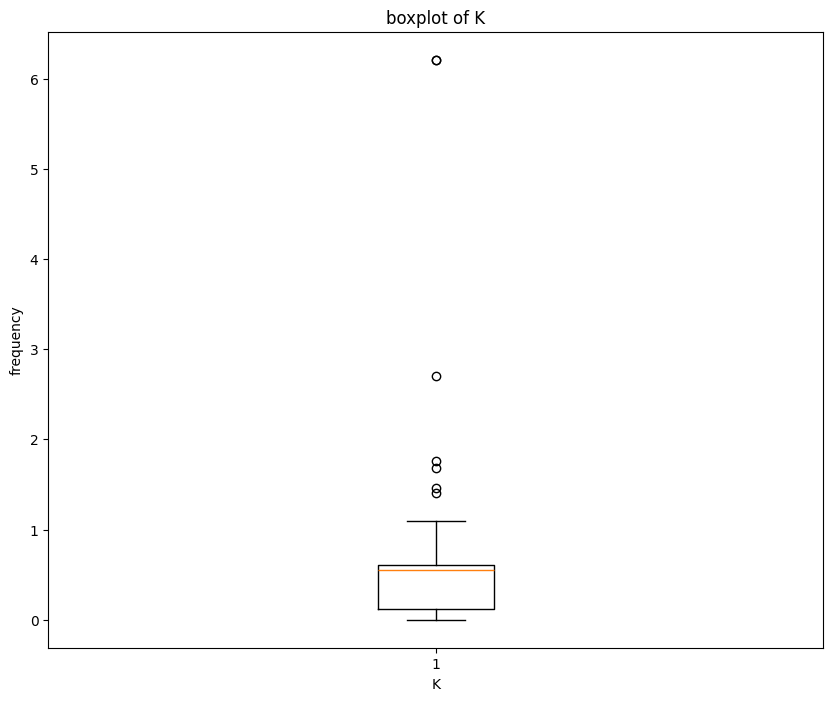

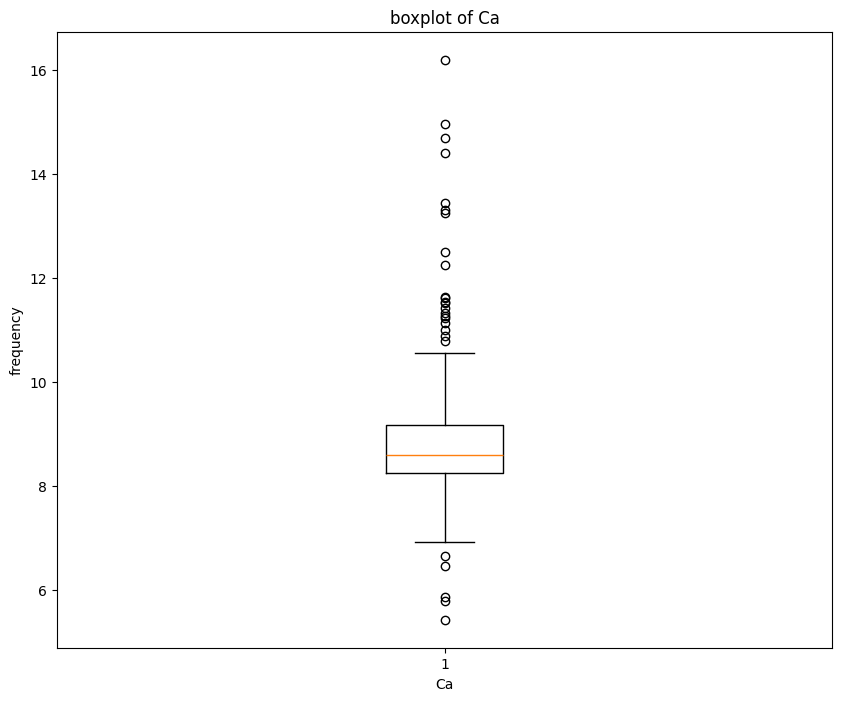

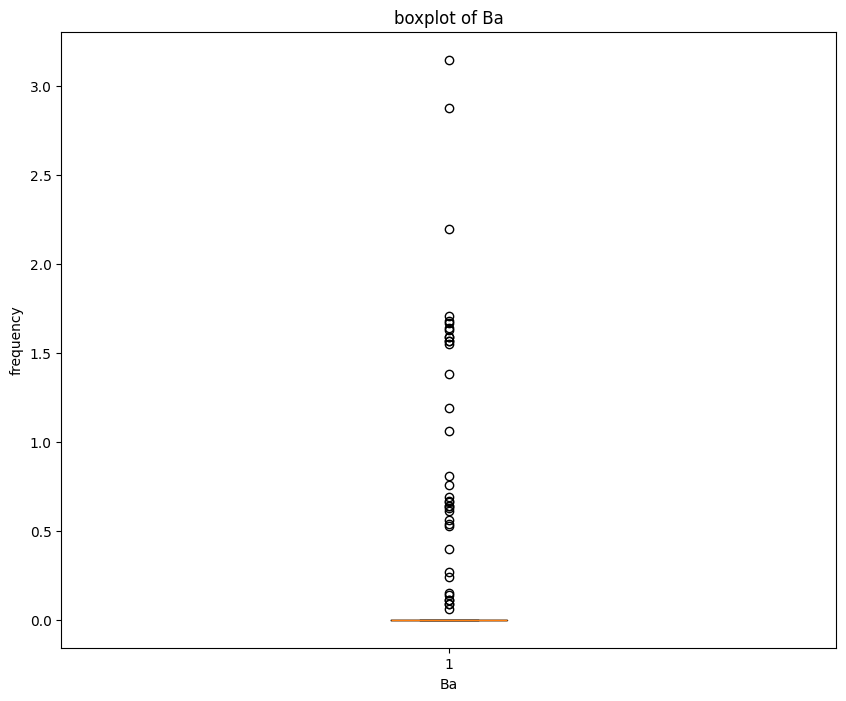

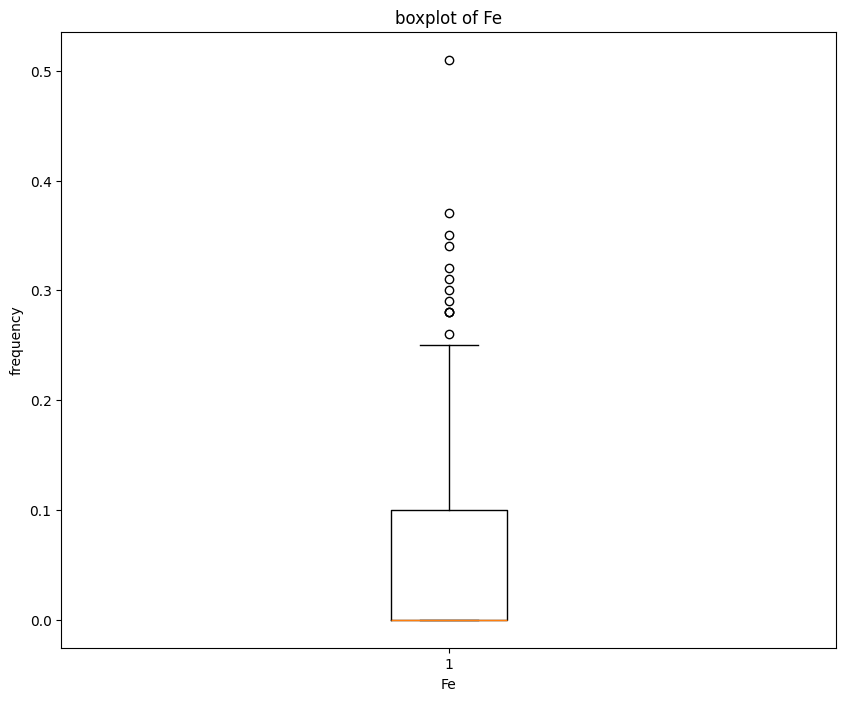

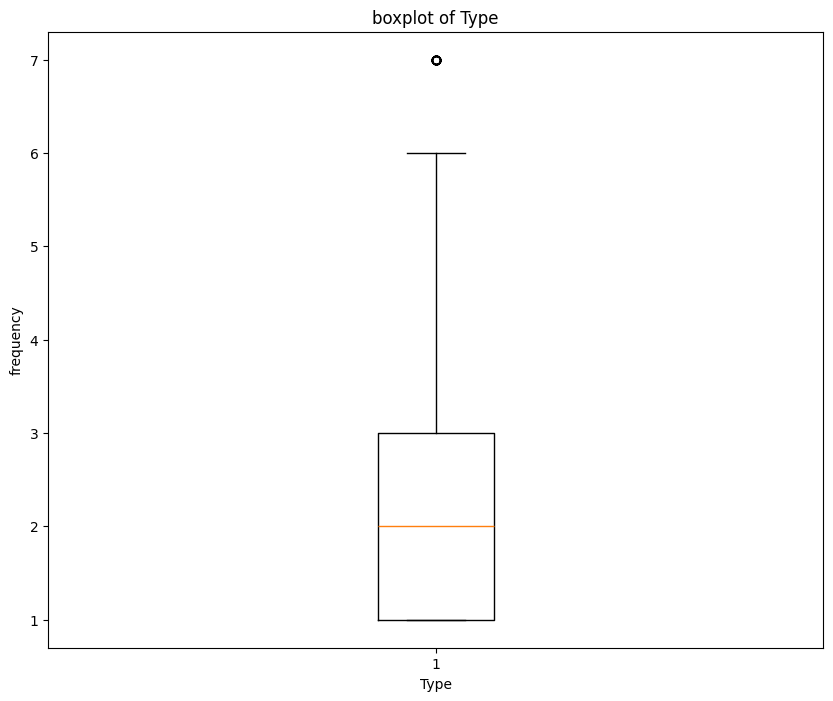

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for n in data.columns:
   plt.figure(figsize=(10,8))
   plt.boxplot(data[n])
   plt.xlabel(n)
   plt.ylabel('frequency')
   plt.title(f"boxplot of {n}")
   plt.show()


In [ ]:
#outliers
for n in data.columns:
    z=np.abs(data[n]-data[n].mean())/data[n].std()
    outlier=np.where(z>3)
    print(n,outlier[0])

RI [106 107 112]
Na [106 184]
Mg []
Al [163 171 172]
Si [106 107 163 184 188 201]
K [171 172 201]
Ca [105 106 107 110 111 112 131]
Ba [106 163 189 203 207 213]
Fe [145 162 174]
Type []


In [ ]:
data.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.duplicated().sum()

1

In [ ]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

   
#   Data Visualization:





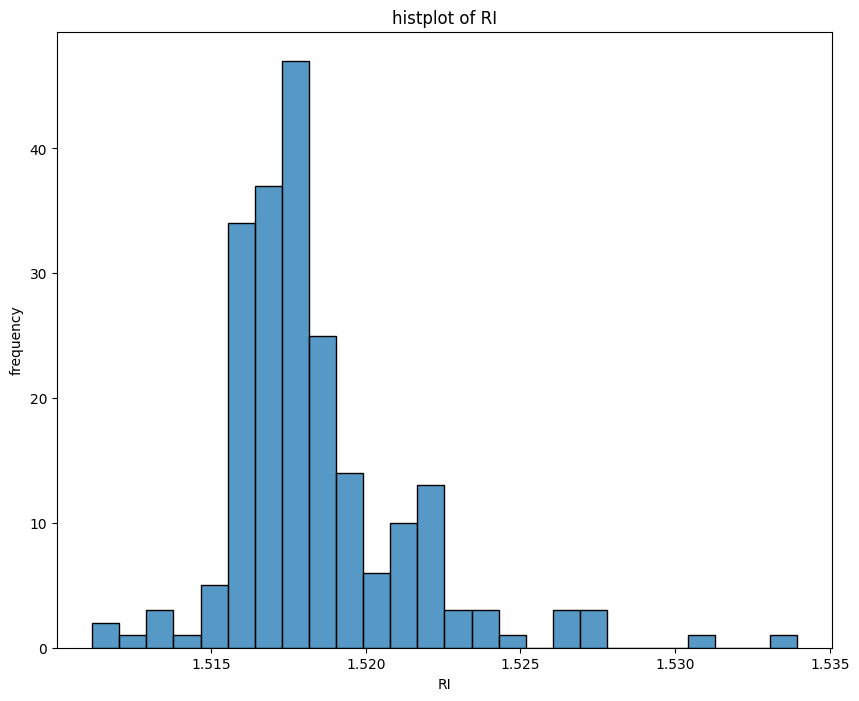

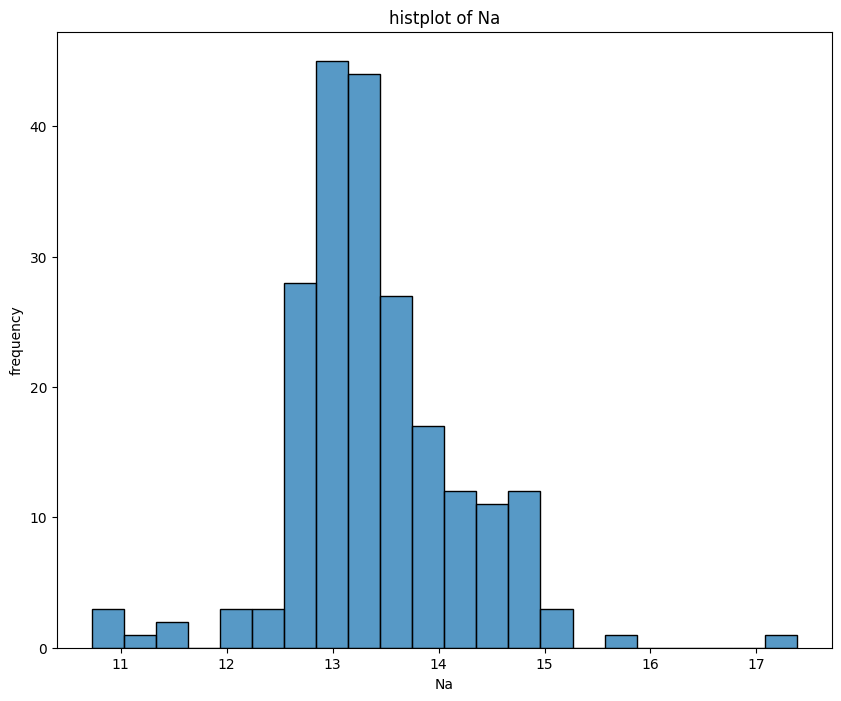

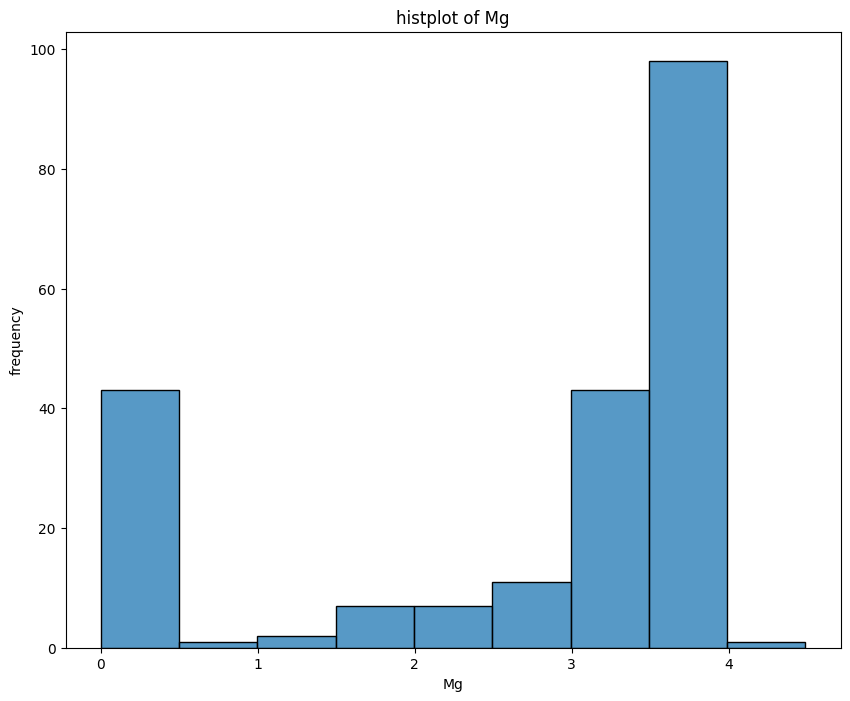

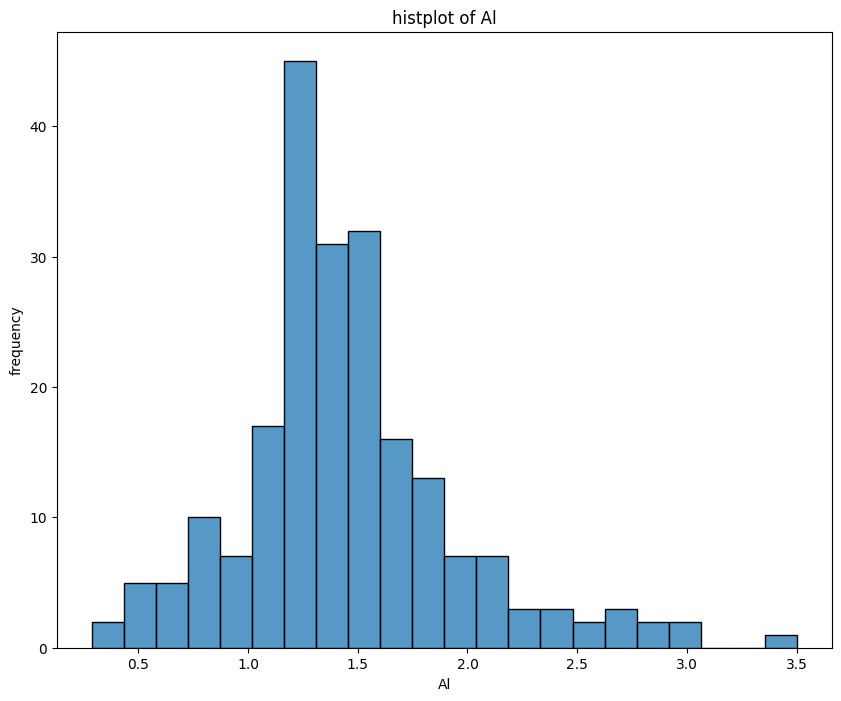

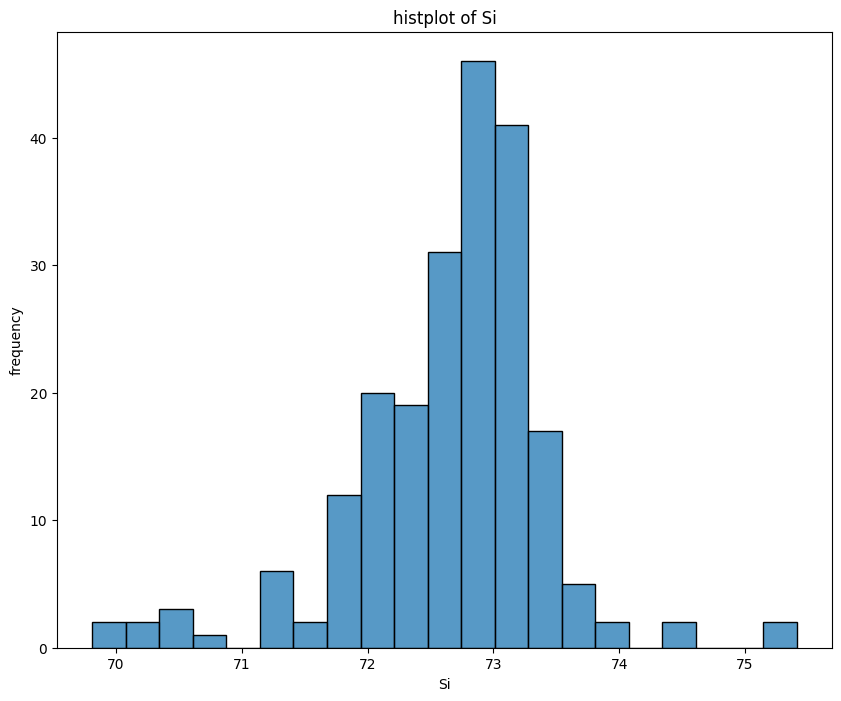

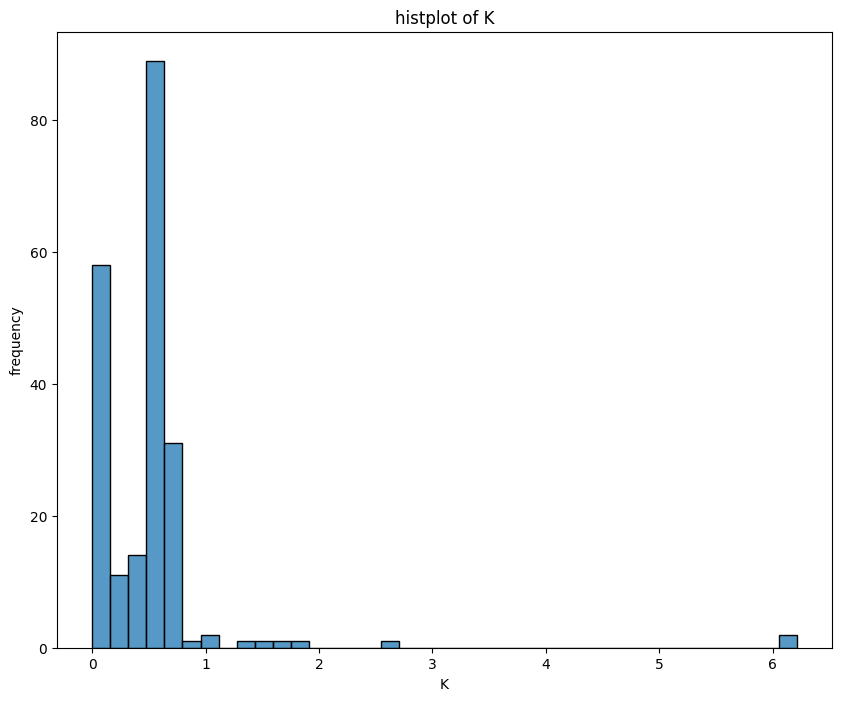

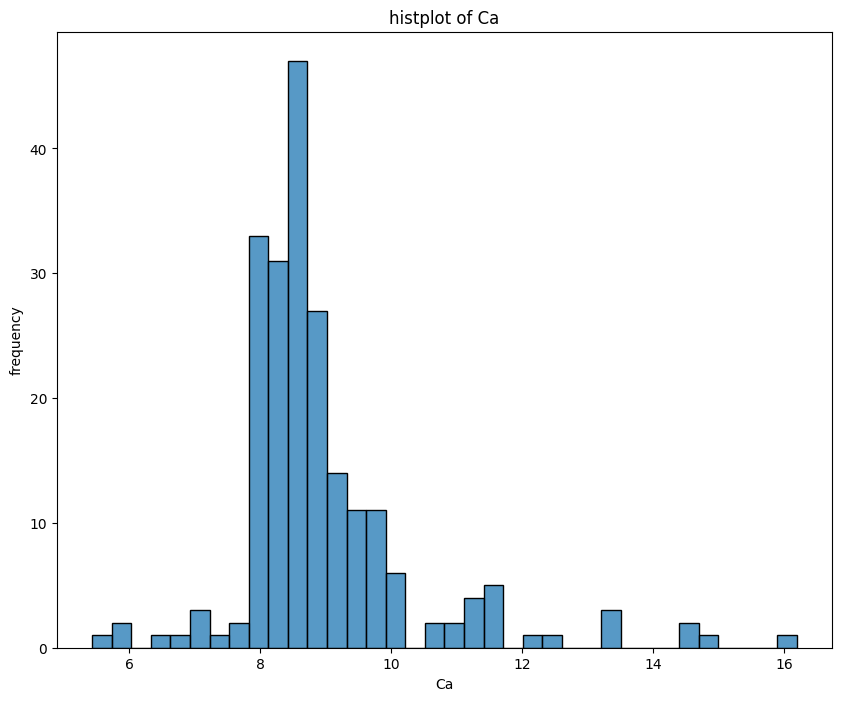

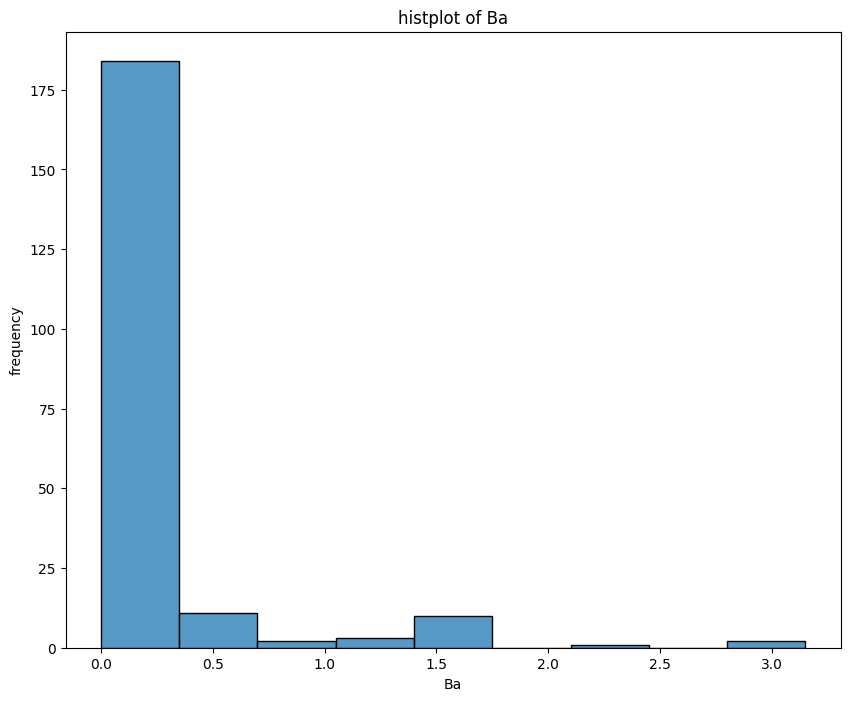

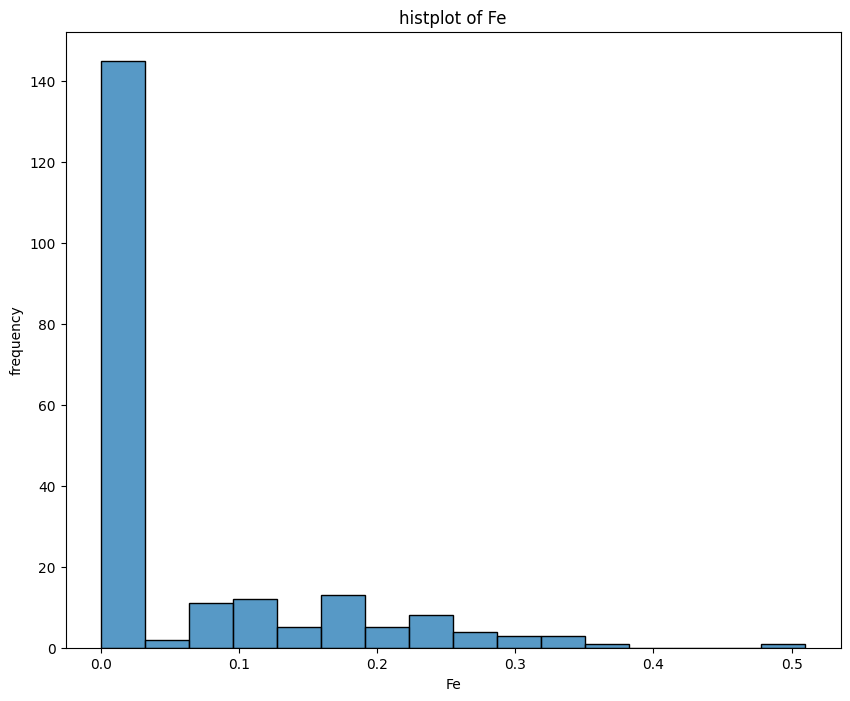

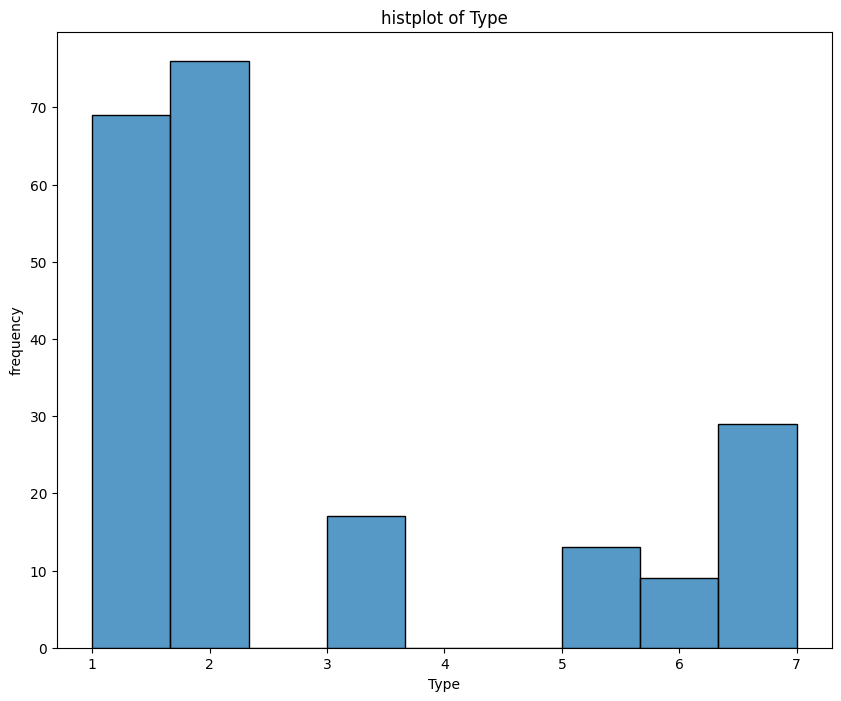

In [ ]:
for n in data.columns:
    plt.figure(figsize=(10,8))
    sns.histplot(data[n])
    plt.xlabel(n)
    plt.ylabel('frequency')
    plt.title(f"histplot of {n}")

    plt.show()

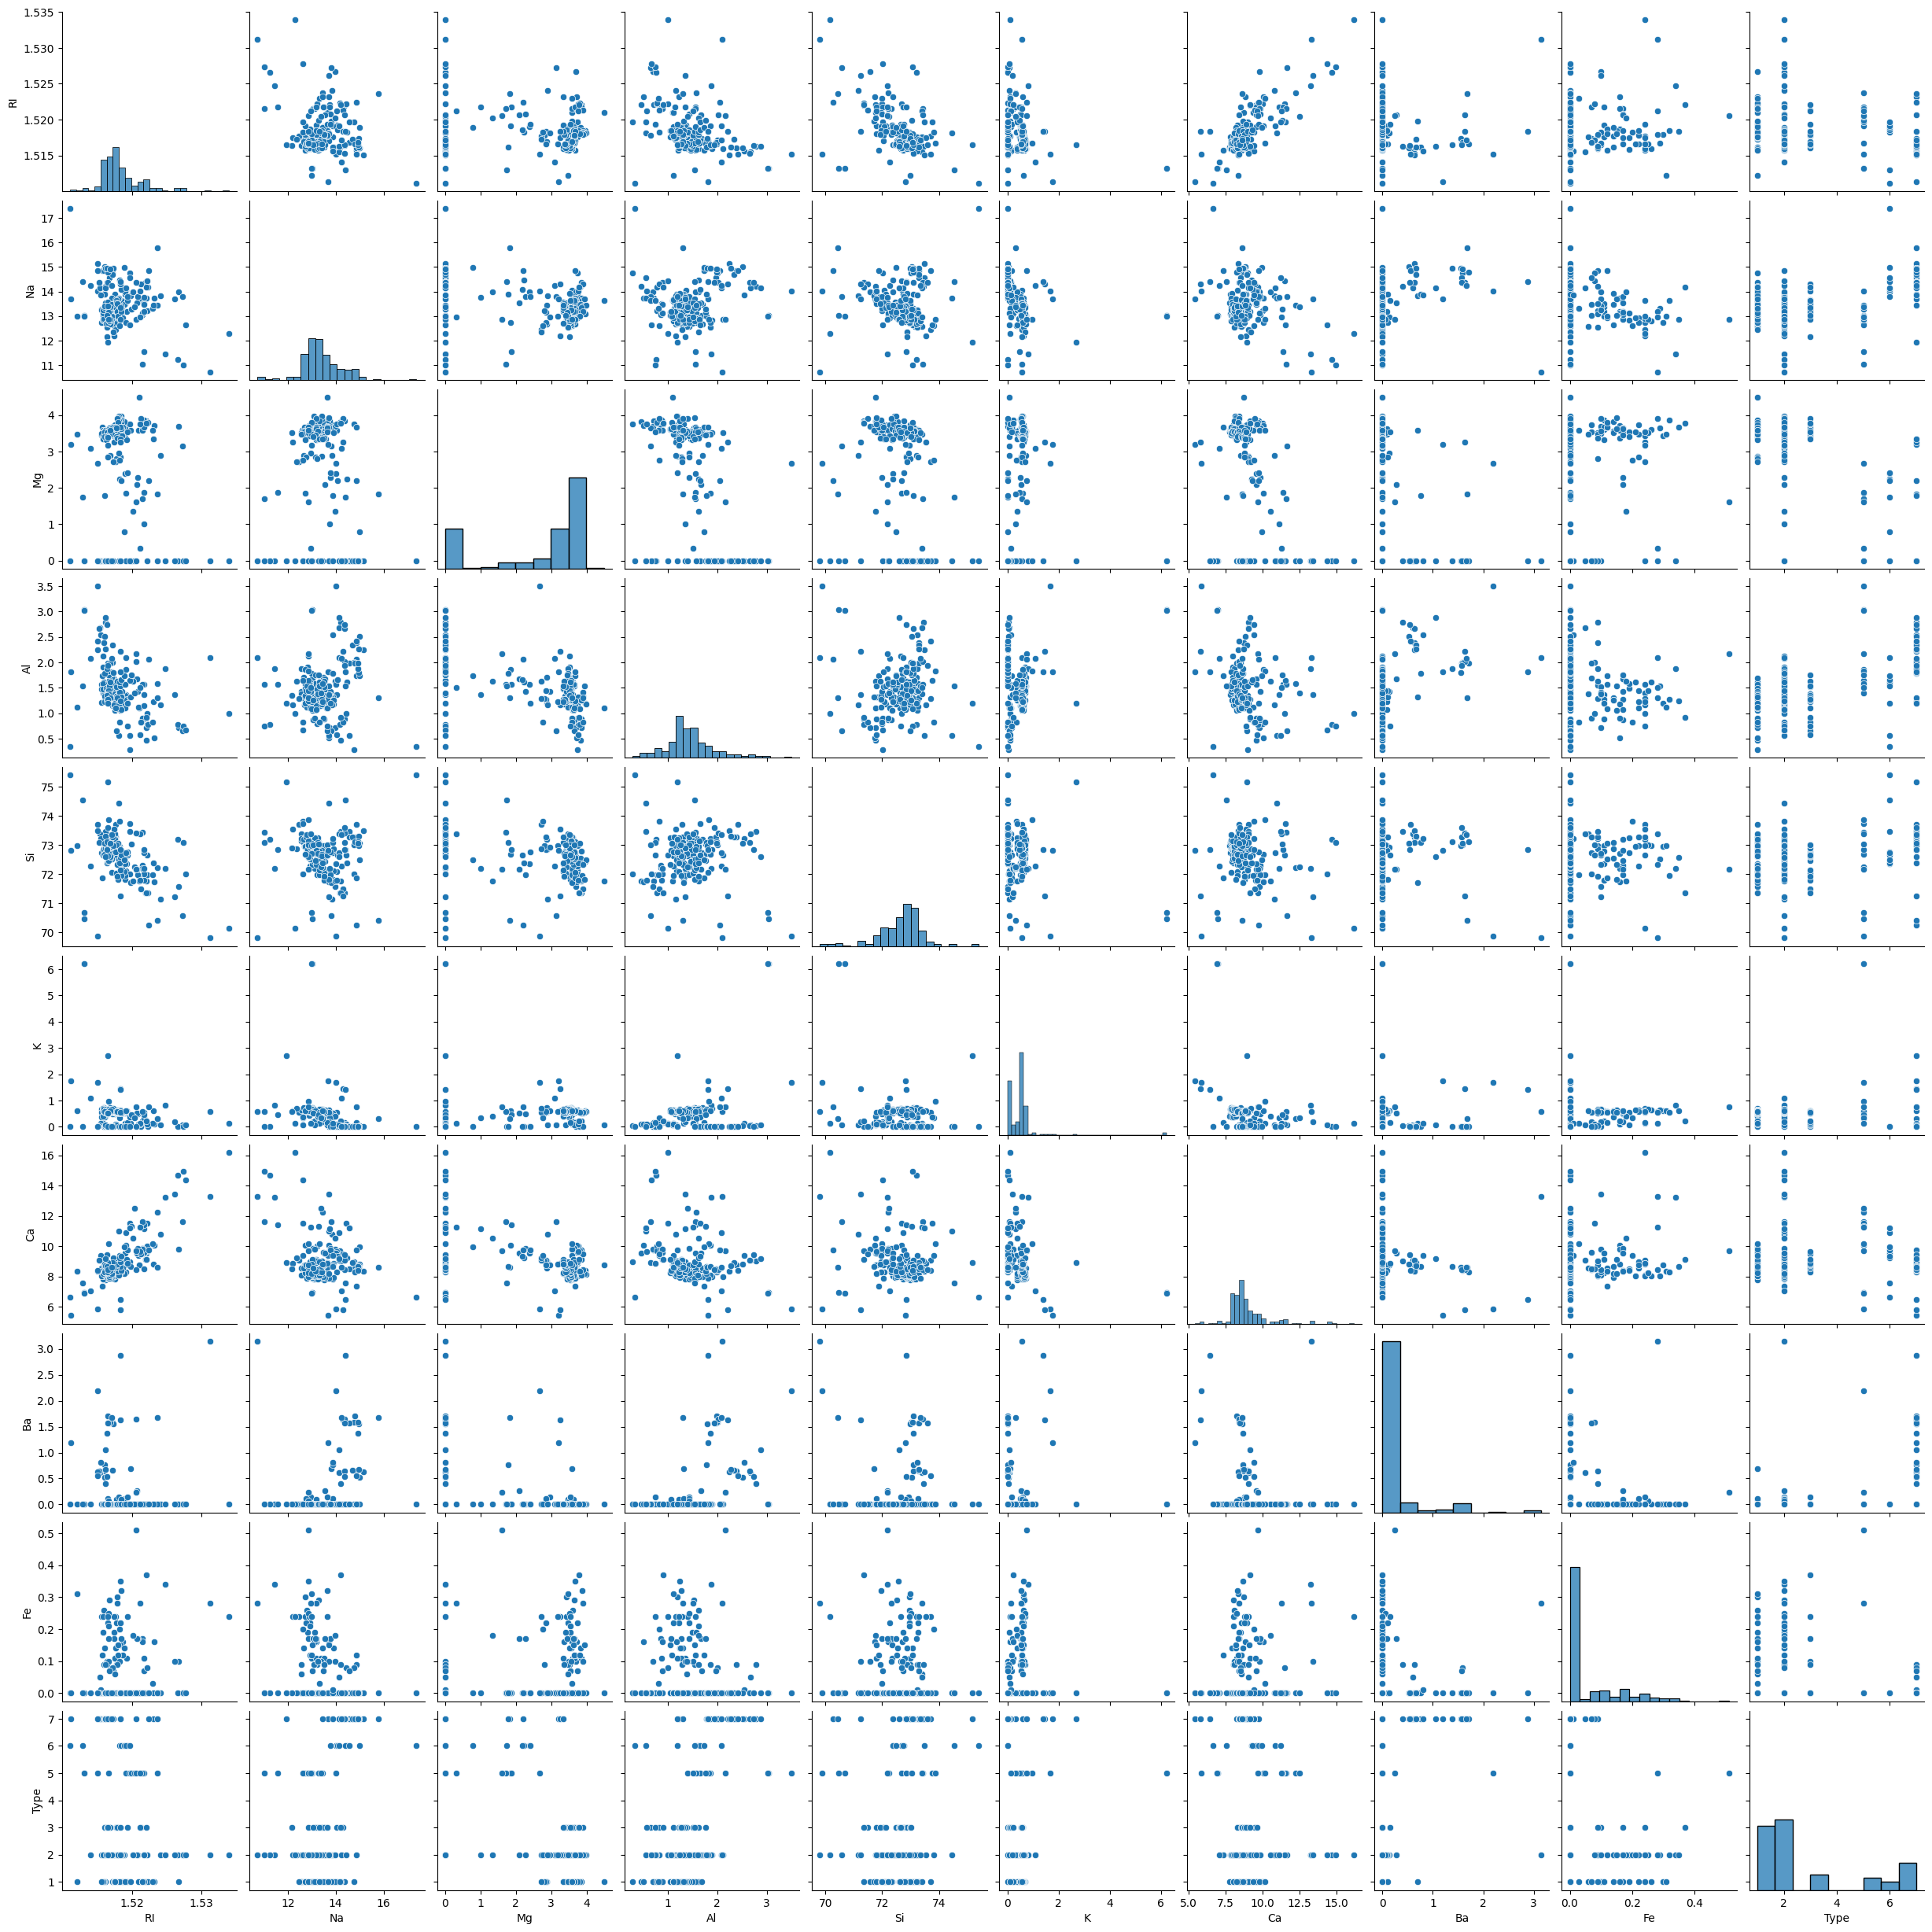

In [ ]:
sns.pairplot(data)

In [ ]:
# correlation between features
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


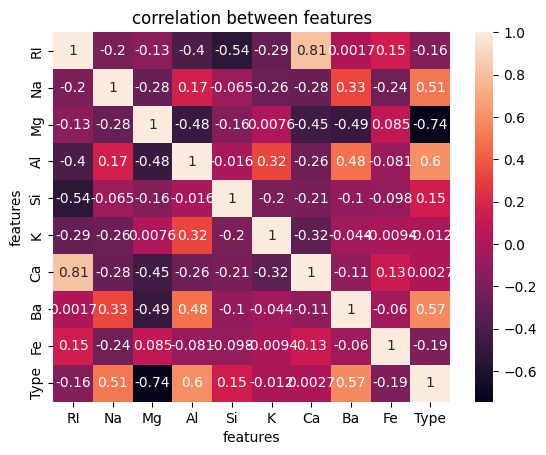

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.xlabel('features')
plt.ylabel('features')
plt.title('correlation between features')
plt.show()

# Data Preprocessing

In [ ]:
#checking missing values
data.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
#since there is no missing values, so no imputation or removal is needed. so dont use null values



In [ ]:
# apply encoding of categorial variables
categorial_col=data.select_dtypes(include=['object']).columns
categorial_col



Index([], dtype='object')

In [ ]:
# in given dataset there is no categorial columns
# so we dont apply one hot  encoding

In [ ]:
#apply scaling as standardization or normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[data.columns]=scaler.fit_transform(data[data.columns])
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,-0.851703
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,-0.851703
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,-0.851703
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,-0.851703
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,-0.851703


In [ ]:
#handling the imbalance data
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
x=data.drop('Type',axis=1)
y=data['Type']
print(y.value_counts())

Type
-0.375554    76
-0.851703    69
 2.005192    29
 0.100595    17
 1.052893    13
 1.529042     9
Name: count, dtype: int64


In [ ]:
import warnings
warnings.filterwarnings('ignore')
y=y.astype('int')
smote=SMOTE(random_state=42) # Removed categorial_col argument
x_resampled,y_resampled=smote.fit_resample(x,y)
print(y_resampled.value_counts())


Type
0    162
1    162
2    162
Name: count, dtype: int64


# Random Forest Model Implementation

In [ ]:
#split into training and testing data
from sklearn.model_selection import train_test_split
x=data.drop('Type',axis=1)
y=data['Type']
y=y.astype('int')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rt_classifier=RandomForestClassifier(random_state=42)
rt_classifier.fit(x_train,y_train)
y_pred=rt_classifier.predict(x_test)
y_pred

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[27,  1,  0],
       [ 1,  5,  0],
       [ 0,  1,  8]])

In [ ]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.71      0.83      0.77         6
           2       1.00      0.89      0.94         9

    accuracy                           0.93        43
   macro avg       0.89      0.90      0.89        43
weighted avg       0.94      0.93      0.93        43



In [ ]:
#Bagging and Boosting Methods
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# bagging classifier
bagging_classifier=BaggingClassifier(estimator=RandomForestClassifier(random_state=42),n_estimators=10,random_state=42)
bagging_classifier.fit(x_train,y_train)
y_pred_bagging=bagging_classifier.predict(x_test)



In [ ]:
#confusion matrox
print(confusion_matrix(y_test,y_pred_bagging))


[[27  1  0]
 [ 0  6  0]
 [ 2  0  7]]


In [ ]:
#classification report of bagging
print(classification_report(y_test,y_pred_bagging))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.86      1.00      0.92         6
           2       1.00      0.78      0.88         9

    accuracy                           0.93        43
   macro avg       0.93      0.91      0.92        43
weighted avg       0.94      0.93      0.93        43



In [ ]:
#boosting methods
ada_classifier=AdaBoostClassifier(n_estimators=50,random_state=42)
ada_classifier.fit(x_train,y_train)
y_pred_ada=ada_classifier.predict(x_test)
print(accuracy_score(y_test,y_pred_ada))
print(confusion_matrix(y_test,y_pred_ada))
print(classification_report(y_test,y_pred_ada))

0.9069767441860465
[[28  0  0]
 [ 0  6  0]
 [ 0  4  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.60      1.00      0.75         6
           2       1.00      0.56      0.71         9

    accuracy                           0.91        43
   macro avg       0.87      0.85      0.82        43
weighted avg       0.94      0.91      0.91        43



In [ ]:
#compare the results
print("\nComparison of Accuracy Scores:")
print(f"Random Forest: {accuracy_score(y_test, y_pred)}")
print(f"Bagging: {accuracy_score(y_test, y_pred_bagging)}")
print(f"AdaBoost: {accuracy_score(y_test, y_pred_ada)}")



Comparison of Accuracy Scores:
Random Forest: 0.9302325581395349
Bagging: 0.9302325581395349
AdaBoost: 0.9069767441860465


Explain Bagging and Boosting methods. How is it different from each other.


# Bagging
   
   Bagging is an ensemble learning technique that aims to improve the accuracy and stability of machine learning algorithms. It works by creating multiple subsets of the original training data through resampling (bootstrap sampling).  Each subset is used to train a separate model (typically of the same type). The predictions of these individual models are then combined (usually by averaging or voting) to produce a final prediction.




#  Boosting:
 Boosting is another ensemble technique, but unlike bagging, it trains models sequentially.  Each subsequent model focuses on correcting the errors made by the previous models.  This means that models are trained on weighted versions of the data, with higher weights given to the misclassified instances.


#   differnce between bagging and bosting:

  Objective:

Bagging reduces variance and prevents overfitting.

Boosting reduces bias and improves accuracy.



Data Sampling:

Bagging uses random sampling with replacement (bootstrapping).

Boosting adjusts weights for samples based on the errors made by previous models



Error Handling:

Bagging averages or votes equally among all models.


Boosting combines predictions using a weighted approach, giving more importance to stronger learners..


Overfitting:

Bagging is less prone to overfitting.

Boosting is more prone to overfitting, especially with noisy data.

Explain how to handle imbalance in the data.



Handling imbalance in the data using SMOTE (Synthetic Minority Over-sampling Technique)
This part of the code is already present in the provided code.
 It uses the imblearn library to oversample the minority classes.
 The SMOTE algorithm creates synthetic samples for the minority classes
 by interpolating between existing minority class samples.
